카카오 API 키, 요청 url가져오기

api: 라이브러리에 접근하기 위한 규칙들을 정의한 것을 API라고 하는데 Application Program Interface 즉, 프로그래머가 라이브러리가 제공하는 여러 함수를 이용하여 프로그램을 작성할 때 해당 함수의 내부 구조는 알 필요없이 단순히 API에 정의된 입력 값을 주고 결과 값을 사용할 수 있게 해줍니다.


메뉴판마냥 클라이언트 - 서버 편하게 연결해줌!

delete 메뉴고르면 자세한거몰라도 그냥 삭제로 알아들어!
고객은 삭제하는법 몰라도돼 서버가해줘 API가 그래서존재함

In [ ]:
# kakao_api_key = ''
# 본인거 맞게 가져와야

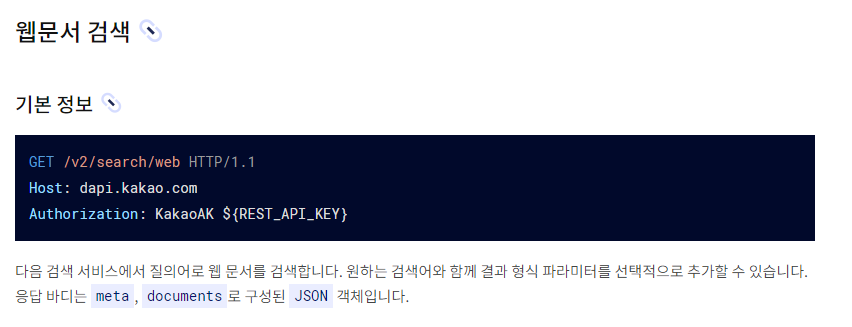

meta : 데이터를 위한 데이터

# 1.<요청방식>
#GET : 요청방식 ***url이용해서 parameter전달 및 요청*** (인터넷 주소창)
  - 단점 : 보안에 매우 취약, 긴값들 큰값들은 전달불가(주소창에다 치는거기때문)
  - 장점 : 속도 개빠름
  - url ? 파 라 미 터
  - ?물음표 뒤엔 전부 파라미터 Query String 사용(key = value & key = value)

#Post : url은 목적지만을 의미(김밥주세요 라면주세요)
#parameter는 body에 숨겨서보냄
  - 단점 : 느림
  - 장점 : 큰것들 전달가능


대표적으로 GET / Post만 설명

# 2. < Host >
# 인터넷상 물리적인 위치
- 192168021 원래ip주소이런데 드러우니까 dap1.kakao.com같은 도메인으로 mapping해서 사용

## /v2/search/web = 메뉴

In [ ]:
kakao_api_key = ''
# kakao_web_search_url = 'https://dapi.kakao.com/주소      v2/search/web메뉴'  # 여기로 이거 주문할거야! 이제 몇줄? 쿼리스트링 쓰면됨
kakao_web_search_url = 'https://dapi.kakao.com/v2/search/web?query=원피스필름레드'


카카오 api에 요청하기 위해서는 인가정보가필요!
마빡 header에 붙여야

In [ ]:
headers = {
    'Authorization': f'KakaoAK {kakao_api_key}'
}


# 요청 모듈 사용하기
- requests
- urllib.request

In [ ]:
import requests

response = requests.get(
    kakao_web_search_url, # 요청 url
    headers=headers # 인가정보 설정
)

response

<Response [200]>

In [ ]:
response.status_code

200

응답 코드(Response Code)

- 1xx : 처리 중 ( 볼 일이 없다 )
- 2xx : Success
- 3xx : Redirection ( 추가 동작이 필요하다. - 볼 일이 많이 없다 )
- 4xx : Client Error ( 클라이언트에서 오류 발생 )
- 401 : UnAuthorized (인가되지 않은 사용자)
- 404 : Page Not Found (잘못된 url로 요청함)
- 5xx : Server Error ( 서버에서 오류발생

서버에 응답한 내용 확인
- 화면 view
  - html, css, Java script 화면을 구성하기 위한 문자열

- Data
  - json, xml, yaml, plain Text...

In [ ]:
datas = response.json() # 응답바디의 내용을 JSON형식으로 '파싱'해서 가져오기

datas

{'documents': [{'contents': '갱신하였다. <b>원피스</b> 극장판 기준 징베가 첫 등장하는 극장판이다. 밀짚모자 일당에 징베와 제우스가 합류하고 조로가 흑도 슈스이가 아닌 엔마를 차고 있는 등, 시점은 와노쿠니편 이후로 보인다. 다만 와노쿠니...',
   'datetime': '2022-10-19T00:00:00.000+09:00',
   'title': '<b>원피스</b> <b>필름</b> <b>레드</b> - 나무위키',
   'url': 'https://namu.wiki/w/%EC%9B%90%ED%94%BC%EC%8A%A4%20%ED%95%84%EB%A6%84%20%EB%A0%88%EB%93%9C'},
  {'contents': '<b>필름</b> <b>레드</b>&gt;의 국내 개봉이 확정됐다. 원작자인 오다 에이치로가 직접 총괄 프로듀서를 맡은 &lt;<b>원피스</b> <b>필름</b> <b>레드</b>&gt;는 지난 8월 6일 일본에서 개봉해 단 10일 만에 5백만 명의 관객을 동원하며 70억 엔의 흥행 수익을...',
   'datetime': '2022-08-17T12:06:18.000+09:00',
   'title': '&#39;<b>원피스</b> <b>필름</b> <b>레드</b>&#39;의 국내 개봉이 확정됐다',
   'url': 'https://hypebeast.kr/2022/8/one-piece-film-red-korea-release-confirmed'},
  {'contents': '현지에서 폭발적인 반응을 얻은 극장판 &lt;<b>원피스</b> <b>필름</b> <b>레드</b>&gt;의 국내 개봉 시기가 결정됐다. 1997년 일본 &lt;주간 소년점프&gt;에서 연재를 시작한 이래 25년간 최정상급 인기를 얻으며 연재 중인 &lt;<b>원피스</b>&gt;는 지난 8...',
   'datetime': '2022-09-20T11:21:29.000+09:00',
   'title': '&#39;<b

# json(java script object notation)
- 자바스크립트 객채표현방식
- 자바스크립트 객채는 파이썬의 dict와 매우 흡사하다.


In [ ]:
datas.keys()

dict_keys(['documents', 'meta'])

In [ ]:
documents = datas['documents']
documents

[{'contents': '갱신하였다. <b>원피스</b> 극장판 기준 징베가 첫 등장하는 극장판이다. 밀짚모자 일당에 징베와 제우스가 합류하고 조로가 흑도 슈스이가 아닌 엔마를 차고 있는 등, 시점은 와노쿠니편 이후로 보인다. 다만 와노쿠니...',
  'datetime': '2022-10-19T00:00:00.000+09:00',
  'title': '<b>원피스</b> <b>필름</b> <b>레드</b> - 나무위키',
  'url': 'https://namu.wiki/w/%EC%9B%90%ED%94%BC%EC%8A%A4%20%ED%95%84%EB%A6%84%20%EB%A0%88%EB%93%9C'},
 {'contents': '<b>필름</b> <b>레드</b>&gt;의 국내 개봉이 확정됐다. 원작자인 오다 에이치로가 직접 총괄 프로듀서를 맡은 &lt;<b>원피스</b> <b>필름</b> <b>레드</b>&gt;는 지난 8월 6일 일본에서 개봉해 단 10일 만에 5백만 명의 관객을 동원하며 70억 엔의 흥행 수익을...',
  'datetime': '2022-08-17T12:06:18.000+09:00',
  'title': '&#39;<b>원피스</b> <b>필름</b> <b>레드</b>&#39;의 국내 개봉이 확정됐다',
  'url': 'https://hypebeast.kr/2022/8/one-piece-film-red-korea-release-confirmed'},
 {'contents': '현지에서 폭발적인 반응을 얻은 극장판 &lt;<b>원피스</b> <b>필름</b> <b>레드</b>&gt;의 국내 개봉 시기가 결정됐다. 1997년 일본 &lt;주간 소년점프&gt;에서 연재를 시작한 이래 25년간 최정상급 인기를 얻으며 연재 중인 &lt;<b>원피스</b>&gt;는 지난 8...',
  'datetime': '2022-09-20T11:21:29.000+09:00',
  'title': '&#39;<b>원피스</b> <b>필름</b> <b>레드

In [ ]:
import pandas as pd

df = pd.DataFrame(documents)
df

,contents,datetime,title,url
0,갱신하였다. <b>원피스</b> 극장판 기준 징베가 첫 등장하는 극장판이다. 밀짚모...,2022-10-19T00:00:00.000+09:00,<b>원피스</b> <b>필름</b> <b>레드</b> - 나무위키,https://namu.wiki/w/%EC%9B%90%ED%94%BC%EC%8A%A...
1,<b>필름</b> <b>레드</b>&gt;의 국내 개봉이 확정됐다. 원작자인 오다 ...,2022-08-17T12:06:18.000+09:00,&#39;<b>원피스</b> <b>필름</b> <b>레드</b>&#39;의 국내 개...,https://hypebeast.kr/2022/8/one-piece-film-red...
2,현지에서 폭발적인 반응을 얻은 극장판 &lt;<b>원피스</b> <b>필름</b> ...,2022-09-20T11:21:29.000+09:00,&#39;<b>원피스</b> <b>필름</b> <b>레드</b>&#39; 국내 개봉...,https://hypebeast.kr/2022/9/one-piece-film-red...
3,[<b>원피스</b>] <b>필름</b> <b>레드</b> 토렌트 자막까지 다뜬듯 ...,2022-08-07T19:21:52.000+09:00,[<b>원피스</b>] <b>필름</b> <b>레드</b> 토렌트 자막까지 다뜬듯,https://gall.dcinside.com/mgallery/board/view/...
4,애니 겨울왕국 2 133.7억엔 (2019년 개봉) 20위 보헤미안 랩소디 131....,2022-09-08T14:21:16.000+09:00,[정보] <b>원피스</b> <b>필름</b> <b>레드</b> 일본 역대 흥행수익...,https://bbs.ruliweb.com/news/board/1002/read/2...
5,<b>원피스</b> <b>필름</b> <b>레드</b> 캠버전 다시보기 1080p ...,2022-08-31T14:06:12.000+09:00,<b>원피스</b> <b>필름</b> <b>레드</b> 캠버전 다시보기 1080p,https://gall.dcinside.com/board/view/?id=onepi...
6,<b>원피스</b> 극장판 신작 ‘<b>원피스</b> <b>필름</b> <b>레드<...,2022-07-25T12:05:00.000+09:00,<b>원피스</b> 극장판 ‘<b>원피스</b> <b>필름</b> <b>레드</b>...,https://www.street.co.kr/2022/07/one-piece-fil...
7,(그림 출처: https://natalie.mu/comic/news/479494) ...,2022-05-30T19:40:59.000+09:00,극장 애니메이션 &#39;<b>원피스</b> <b>필름</b> <b>레드</b>&#...,https://bbs2.onnada.com/E000023/47936
8,그림 출처: https://natalie.mu/music/news/480759) 2...,2022-06-09T05:00:59.000+09:00,"<b>원피스</b> <b>필름</b> <b>레드</b>, Ado가 담당하는 주제가의...",https://bbs2.onnada.com/E000023/48028
9,벼랑 위의 포뇨 155억엔 (2008년 개봉) 13위 애니 날씨의 아이 141.9억...,2022-09-12T15:32:09.000+09:00,[정보] [<b>원피스</b> <b>필름</b> <b>레드</b>] 37일차 일본 ...,https://bbs.ruliweb.com/news/board/1002/read/2...


In [ ]:
# 데이터프레임을 csv로 저장

df.to_csv('filmred.csv',encoding = 'utf-8')
